In [1]:
from IPython.display import HTML
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
x = np.linspace(0, 4, 1000)
ts = np.linspace(0, 4, 100)
def sig(t):
    return np.exp(-(t-x)**2)*np.cos(2*2*np.pi*(t-x))
def sig(t):
    s = np.zeros_like(x)
    s[np.abs(t-x+0.1)<0.1] = 1
    return s
def sig_msg(t):
    return sig(t) - sig(t+0.2) + sig(t+0.4) + sig(t+0.6) - sig(t+0.8)

In [3]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

In [4]:
order = 6  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
ripple_db = 3  # Maximum ripple allowed below unity gain in passband (in dB)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.cheby1(order, ripple_db, normal_cutoff, btype='low', analog=False)

In [5]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.bessel(order, normal_cutoff, btype='low', analog=False)

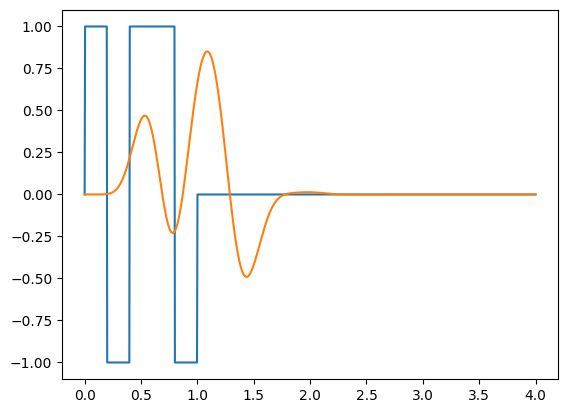

In [6]:
filtered_sig = lambda t: signal.lfilter(b, a, sig_msg(t))
fig, ax = plt.subplots()
ax.plot(x, sig_msg(0), label='Original signal')
ax.plot(x, filtered_sig(0), label='Filtered signal')
plt.show()

In [13]:
w_D = 2*np.pi*24e3
signal.cheb1ord(w_D, 2*np.pi*30e3, 0.5, 25, analog=True)

(7, 150796.44737231007)

In [21]:
R = 500
C = np.array([9.4555, 19.6486, 20.6314, 16.6655])
L = np.array([0.1513, 0.1778, 0.1761])
C = C/(w_D*R)
L = L/(w_D)*R

In [23]:
C*1e9, L*1e6

(array([125.4074637 , 260.59765124, 273.63244108, 221.03305867]),
 array([501.66964354, 589.53643504, 583.89969747]))